In [2]:
# !pip install opencv-python


55
53


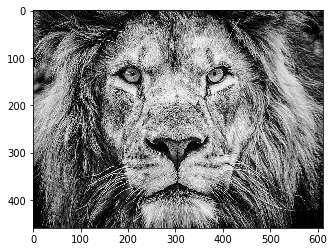

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


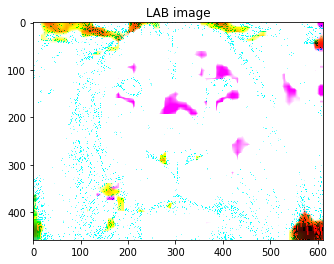

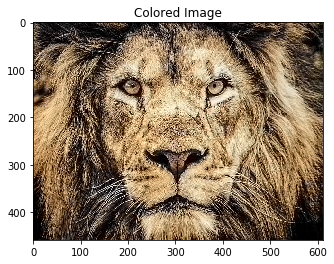

True

In [20]:
# Importing libraries

import numpy as np
import matplotlib.pyplot as plt
import cv2



# Name of testing image

image = '05.jpg'


prototxt = "C:/Courses for udemy/Prism Course/Project3/color/colorization_deploy_v2.prototxt"
caffe_model = "C:/Courses for udemy/Prism Course/Project3/color/colorization_release_v2.caffemodel"
pts_npy = "C:/Courses for udemy/Prism Course/Project3/color/pts_in_hull.npy"


test_image = "C:/Courses for udemy/Prism Course/Project3/color/"+image


net = cv2.dnn.readNetFromCaffe(prototxt, caffe_model)
pts = np.load(pts_npy)
 
    


layer1 = net.getLayerId("class8_ab")
print(layer1)
layer2 = net.getLayerId("conv8_313_rh")
print(layer2)
pts = pts.transpose().reshape(2, 313, 1, 1)
net.getLayer(layer1).blobs = [pts.astype("float32")]
net.getLayer(layer2).blobs = [np.full([1, 313], 2.606, dtype="float32")]





test_image = cv2.imread(test_image)

test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

test_image = cv2.cvtColor(test_image, cv2.COLOR_GRAY2RGB)

plt.imshow(test_image)
plt.show()




normalized = test_image.astype("float32") / 255.0

lab_image = cv2.cvtColor(normalized, cv2.COLOR_RGB2LAB)

resized = cv2.resize(lab_image, (224, 224))

L = cv2.split(resized)[0]
L -= 50   # OR we can write L = L - 50



net.setInput(cv2.dnn.blobFromImage(L))

ab = net.forward()[0, :, :, :].transpose((1, 2, 0))

ab = cv2.resize(ab, (test_image.shape[1], test_image.shape[0]))



L = cv2.split(lab_image)[0]

LAB_colored = np.concatenate((L[:, :, np.newaxis], ab), axis=2)

plt.imshow(LAB_colored)
plt.title('LAB image')
plt.show()



RGB_colored = cv2.cvtColor(LAB_colored,cv2.COLOR_LAB2RGB)

RGB_colored = np.clip(RGB_colored, 0, 1)

RGB_colored = (255 * RGB_colored).astype("uint8")

plt.imshow(RGB_colored)
plt.title('Colored Image')
plt.show()



RGB_BGR = cv2.cvtColor(RGB_colored, cv2.COLOR_RGB2BGR)

cv2.imwrite("C:/Courses for udemy/Prism Course/Project3/color/output_images/"+image, RGB_BGR)